### Advanced Machine Learning

# Home Exercise #4

Assignment Due: 17/05/21 23:59

Jonathan Schler

In [372]:
student1Name="Alexander Kruglyak"
student1ID="323637736"


student2Name="Sofya Zubtsovsky"
student2ID="337839112"


In [420]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, RidgeCV, LassoCV, ElasticNet
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:f}'.format

The goal of this homework is to try to solve the problem of predicting wine quality from review texts and other properties of the wine. You can find the dataset here:https://www.kaggle.com/zynicide/wine-reviews

While you can find several kernels on kaggle already, I highly recommend you start your ownsolution from scratch. For this homework, only use wine from the United States (only 42% of data). Feel free to subsample the data for building your model.

## Task 1 Bag of Words and simple Features [50pts]

1.1 Create a baseline model for predicting wine quality using only non-text features.





In [374]:
def show_data_basic_information(df):
    print("Info\n")
    print(df.info())
    print("\n" + "*" * 10 + "\n")
    
    print("Shape\n")
    print(df.shape) 
    print("\n" + "*" * 10 + "\n")
    
    print("Amount of is null data\n")
    print(df.isnull().sum().max())
    print("\n" + "*" * 10 + "\n")
    
    print("Describe\n")
    display(df.describe())
    print("\n" + "*" * 10 + "\n")

In [375]:
full_df = pd.read_csv("winemag-data-130k-v2.csv")

In [376]:
show_data_basic_information(full_df)

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), objec

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000



**********



In [377]:
full_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [378]:
def take_us_wines(_df):
    df = _df[_df['country']=="US"]
    return df

In [379]:
us_df = take_us_wines(full_df)
show_data_basic_information(us_df)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             54504 non-null  int64  
 1   country                54504 non-null  object 
 2   description            54504 non-null  object 
 3   designation            36908 non-null  object 
 4   points                 54504 non-null  int64  
 5   price                  54265 non-null  float64
 6   province               54504 non-null  object 
 7   region_1               54226 non-null  object 
 8   region_2               50511 non-null  object 
 9   taster_name            37730 non-null  object 
 10  taster_twitter_handle  34741 non-null  object 
 11  title                  54504 non-null  object 
 12  variety                54504 non-null  object 
 13  winery                 54504 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usag

,Unnamed: 0,points,price
count,54504.000000,54504.000000,54265.000000
mean,65467.828563,88.563720,36.573464
std,37572.539161,3.114840,27.088857
min,2.000000,80.000000,4.000000
25%,33067.750000,86.000000,20.000000
50%,65678.500000,88.000000,30.000000
75%,98191.250000,91.000000,45.000000
max,129967.000000,100.000000,2013.000000



**********



In [380]:
def drop_nan_price(_df):
    df = _df.dropna(subset=['price'])
    return df

In [381]:
print('nan price before: ' + str(us_df['price'].isna().sum()))
us_df_cleaned = drop_nan_price(us_df)
print('nan price after: ' + str(us_df_cleaned['price'].isna().sum()))

nan price before: 239
nan price after: 0


In [382]:
def get_categorical_features(df):
    return df.select_dtypes(include=['object'])
def get_continuous_features(df):
    return df.select_dtypes(exclude=['object'])

In [383]:
def fill_nan_object_column(_df):
    df = _df.copy()
    categorical = get_categorical_features(_df)
    df[categorical.columns] = _df[categorical.columns].fillna("unknown")
    return df

In [384]:
print ('='*10 + " US wines as is\n"+'='*10,us_df_cleaned.isna().sum())
us_df_filled = fill_nan_object_column(us_df_cleaned)
print ('='*10 + " US wines without NaN\n"+'='*10,us_df_filled.isna().sum())

========== US wines as is
========== Unnamed: 0                   0
country                      0
description                  0
designation              17514
points                       0
price                        0
province                     0
region_1                   276
region_2                  3973
taster_name              16754
taster_twitter_handle    19730
title                        0
variety                      0
winery                       0
dtype: int64
========== US wines without NaN
========== Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64


In [385]:
def drop_columns(df, columns):
    return df.copy().drop(columns, axis=1)

def get_label_and_drop(_df):
    df = _df.copy()
    label = df['points']
    df = drop_columns(df,['points'])
    return df, label

In [386]:
irrelevant_columns = ['Unnamed: 0','taster_name','taster_twitter_handle','country']
us_df_filled = drop_columns(us_df_filled,irrelevant_columns)

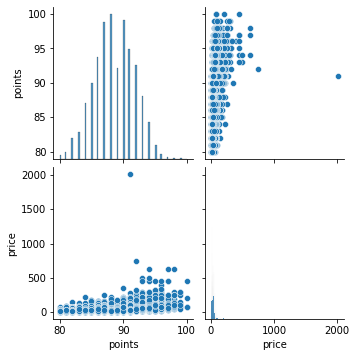

In [387]:
sns.pairplot(us_df_filled)

<AxesSubplot:xlabel='price', ylabel='Density'>

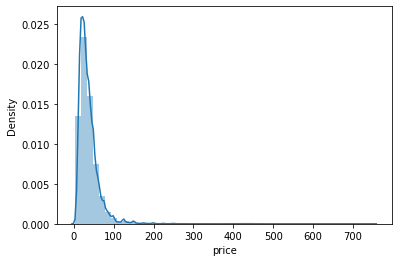

In [388]:
### remove anomally high price
us_df_filled = us_df_filled[us_df_filled.price != np.max(us_df_filled.price)]
us_df_filled
sns.distplot(us_df_filled['price'])


In [389]:
us_df_filled.sort_values(by='price',inplace=True)
us_df_filled.tail(10)

,description,designation,points,price,province,region_1,region_2,title,variety,winery
128991,A pinch of hard tannins gives this bone-dry yo...,La Muse,93,450.000000,California,Sonoma County,Sonoma,Verité 2008 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
118066,"The blend is mainly Cabernet Sauvignon, with t...",La Joie,96,450.000000,California,Sonoma County,Sonoma,Verité 2007 La Joie Red (Sonoma County),Bordeaux-style Red Blend,Verité
118063,A spectacular wine that defines the upper limi...,Le Desir,97,450.000000,California,Sonoma County,Sonoma,Verité 2007 Le Desir Red (Sonoma County),Bordeaux-style Red Blend,Verité
118062,The 2008 vintage presented challenges for Cabe...,Le Desir,97,450.000000,California,Sonoma County,Sonoma,Verité 2008 Le Desir Red (Sonoma County),Bordeaux-style Red Blend,Verité
124436,"Here's a big, flashy, cult-style wine if ever ...",unknown,94,500.000000,California,Napa Valley,Napa,Harlan Estate 2006 Red (Napa Valley),Bordeaux-style Red Blend,Harlan Estate
15135,This is a hugely structured and concentrated w...,Double Plus Estate Grown,93,500.000000,California,Rutherford,Napa,Hewitt 2013 Double Plus Estate Grown Cabernet ...,Cabernet Sauvignon,Hewitt
25382,"As imposing as the athlete himself, this is an...",Family Reserve,94,625.000000,California,Napa Valley,Napa,Yao Ming 2011 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming
38978,We can debate the pricing on Yao Ming's new re...,Family Reserve,98,625.000000,California,Napa Valley,Napa,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming
83852,The former basketball star's initial release i...,Family Reserve,97,625.000000,California,Napa Valley,Napa,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming
51978,"This is a powerful bottling, as is expected by...",Intrepid,92,750.000000,California,Paso Robles,Central Coast,Law 2013 Intrepid Syrah (Paso Robles),Syrah,Law


Text(0.5, 1.0, 'Distribution of points')

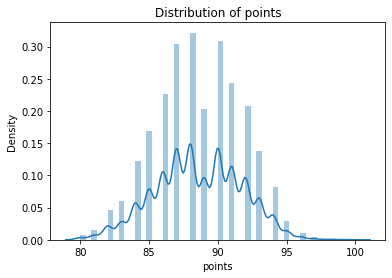

In [390]:
sns.distplot(us_df_filled['points'], hist=True, kde=True)
plt.title("Distribution of points")

In [397]:
def print_unique_count(df):
    for (featureName, featureData) in df.select_dtypes(include=['object']).iteritems():
        print("{} has unique values: {}".format(featureName, featureData.nunique()))

In [398]:
def show_random_text(_df,feature,n=1):
    df = _df.sample(n=n,random_state=42)
    print(list(df[feature]))

In [399]:
show_random_text(us_df_filled,'description')

['This barrel-fermented white wine from Jesse Katz of Devil Proof and Aperture Wines is impressively layered and complex. A reductive whiff of petrol leads on the nose yet the palate is juicy, showing a wealth of peach skin and green apple. A bite of acidity supports its fresh, fruity core.']


In [400]:
show_random_text(us_df_filled,'designation',5)

['unknown', 'Patio', 'unknown', 'unknown', 'Spirit Canyon Vineyard']


In [401]:
show_random_text(us_df_filled,'title',10)

['The Setting 2016 Sauvignon Blanc (Sonoma County)', 'C&T; 2006 Patio Pinot Noir (Napa-Sonoma)', 'Thomas Fogarty 2004 Merlot (Santa Cruz Mountains)', 'Peter Cellars 2006 Cabernet Sauvignon (Chalk Hill)', 'Briceland 2016 Spirit Canyon Vineyard Arneis (Mendocino County)', 'Chimney Rock 2014 Estate Grown Cabernet Sauvignon (Stags Leap District)', 'Heron Hill 2009 Unoaked Ingle Vineyard Chardonnay (Finger Lakes)', 'Armanino Family Cellars 2013 The Pintail Pinot Noir (Napa Valley)', 'Truchard 2011 Chardonnay (Carneros)', 'Serdonis 2004 Ink Grade Vineyard Cabernet Sauvignon (Howell Mountain)']


In [402]:
show_random_text(us_df_filled,'variety',10)

['Sauvignon Blanc', 'Pinot Noir', 'Merlot', 'Cabernet Sauvignon', 'Arneis', 'Cabernet Sauvignon', 'Chardonnay', 'Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon']


In [403]:
show_random_text(us_df_filled,'winery',10)

['The Setting', 'C&T;', 'Thomas Fogarty', 'Peter Cellars', 'Briceland', 'Chimney Rock', 'Heron Hill', 'Armanino Family Cellars', 'Truchard', 'Serdonis']


In [404]:
show_random_text(us_df_filled,'region_1',10)

['Sonoma County', 'Napa-Sonoma', 'Santa Cruz Mountains', 'Chalk Hill', 'Mendocino County', 'Stags Leap District', 'Finger Lakes', 'Napa Valley', 'Carneros', 'Howell Mountain']


In [405]:
show_random_text(us_df_filled,'region_2',10)

['Sonoma', 'Napa-Sonoma', 'Central Coast', 'Sonoma', 'unknown', 'Napa', 'Finger Lakes', 'Napa', 'Napa-Sonoma', 'Napa']


In [406]:
print_unique_count(us_df_filled)

description has unique values: 50229
designation has unique values: 14131
province has unique values: 27
region_1 has unique values: 265
region_2 has unique values: 18
title has unique values: 50011
variety has unique values: 257
winery has unique values: 5368


In [407]:
us_df_filled.winery.value_counts().head(20)

Testarossa               217
Williams Selyem          211
Chateau Ste. Michelle    193
Columbia Crest           158
Kendall-Jackson          130
Siduri                   126
Gary Farrell             125
Lynmar                   118
Robert Mondavi           112
Fess Parker              108
V. Sattui                107
Iron Horse               106
Foxen                    105
Maryhill                 102
Chehalem                 102
Kunde                    101
Dutton-Goldfield         100
Terre Rouge              100
Kenwood                   98
Martin Ray                98
Name: winery, dtype: int64

In [408]:
def get_dummies(_df,columns_to_dummy):
    df = _df.copy()
    df = pd.get_dummies(df,columns=columns_to_dummy)
    return df

In [409]:
def get_cat_codes(_df,columns_to_cat):
    df = _df.copy()
    for col in columns_to_cat:
        df[col]= df[col].astype('category').cat.codes
    return df

In [410]:
# columns_to_dummy = ['province','variety']
columns_to_dummy = ['province','variety','region_1']
# columns_to_codes = ['region_1','region_2','winery','title']

In [411]:
for col in columns_to_dummy:
    print('==='+col+'===')
    print(us_df_filled[col].value_counts())

===province===
California           36103
Washington            8583
Oregon                5359
New York              2676
Virginia               770
Idaho                  190
Michigan               111
America                 95
Texas                   93
Colorado                68
New Mexico              45
Arizona                 40
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Massachusetts            7
Washington-Oregon        7
Illinois                 6
Nevada                   4
Iowa                     4
Connecticut              3
Vermont                  3
Kentucky                 1
Hawaii                   1
Rhode Island             1
Name: province, dtype: int64
===variety===
Pinot Noir                           9857
Cabernet Sauvignon                   7280
Chardonnay                           6772
Syrah                                3232
Red Blend                            2948
   

In [412]:
def cat_feature_to_other(df, featureName):
    _df = df.copy()
    total = len(_df[featureName].value_counts().index.to_list())
    to_default = total - 15
    less_popular = _df[featureName].value_counts().tail(to_default).index.tolist()
    _df[featureName].replace(to_replace=less_popular, value='other', inplace=True)
    return _df

In [413]:
for col in columns_to_dummy:
    us_df_filled = cat_feature_to_other(us_df_filled,col)

In [414]:
for col in columns_to_dummy:
    print('==='+col+'===')
    print(us_df_filled[col].value_counts())

===province===
California        36103
Washington         8583
Oregon             5359
New York           2676
Virginia            770
Idaho               190
Michigan            111
America              95
Texas                93
Colorado             68
other                57
New Mexico           45
Arizona              40
Missouri             33
North Carolina       23
Pennsylvania         18
Name: province, dtype: int64
===variety===
Pinot Noir                  9857
other                       9161
Cabernet Sauvignon          7280
Chardonnay                  6772
Syrah                       3232
Red Blend                   2948
Zinfandel                   2705
Merlot                      2300
Sauvignon Blanc             2154
Bordeaux-style Red Blend    1817
Riesling                    1745
Cabernet Franc               999
Rosé                         900
Pinot Gris                   863
Viognier                     786
Petite Sirah                 745
Name: variety, dtype: int64
==

In [415]:
us_dummied = get_dummies(us_df_filled,columns_to_dummy)

In [416]:
columns_to_drop = ['description','designation','title','winery','region_2']
us_df_cleaned = drop_columns(us_dummied,columns_to_drop)

In [417]:
show_data_basic_information(us_df_cleaned)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54264 entries, 110255 to 51978
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   points                            54264 non-null  int64  
 1   price                             54264 non-null  float64
 2   province_America                  54264 non-null  uint8  
 3   province_Arizona                  54264 non-null  uint8  
 4   province_California               54264 non-null  uint8  
 5   province_Colorado                 54264 non-null  uint8  
 6   province_Idaho                    54264 non-null  uint8  
 7   province_Michigan                 54264 non-null  uint8  
 8   province_Missouri                 54264 non-null  uint8  
 9   province_New Mexico               54264 non-null  uint8  
 10  province_New York                 54264 non-null  uint8  
 11  province_North Carolina           54264 non-null  uint8 

,points,price,province_America,province_Arizona,province_California,province_Colorado,province_Idaho,province_Michigan,province_Missouri,province_New Mexico,...,region_1_Paso Robles,region_1_Russian River Valley,region_1_Santa Barbara County,region_1_Sonoma Coast,region_1_Sonoma County,region_1_Sta. Rita Hills,region_1_Walla Walla Valley (WA),region_1_Willamette Valley,region_1_Yakima Valley,region_1_other
count,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,...,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000,54264.000000
mean,88.566342,36.537041,0.001751,0.000737,0.665321,0.001253,0.003501,0.002046,0.000608,0.000829,...,0.042883,0.056944,0.018318,0.027034,0.022943,0.017894,0.019553,0.042312,0.018134,0.463051
std,3.116837,25.726073,0.041805,0.027141,0.471882,0.035378,0.059069,0.045182,0.024653,0.028786,...,0.202595,0.231737,0.134099,0.162185,0.149724,0.132567,0.138458,0.201301,0.133436,0.498637
min,80.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



**********



## Linear models on numerical data

In [418]:
def add_score(scores_df, score, regressorName, dataType):
    scores_df.loc[regressorName + '_' + dataType, 'r2'] = np.mean(score)

In [460]:
def get_cross_val_score(scores_df,estimator,X_train,y_train,prefix="",sampler=None):
        name = estimator.__class__.__name__
        if estimator.__class__ is Pipeline:
            name = estimator.named_steps['estimator'].__class__.__name__
        pipe = estimator
        sampler_name = ""
        if sampler is not None:
            pipe = make_imb_pipeline(sampler(random_state=42), estimator)
            sampler_name = sampler.__name__
        print('*********' + name + ' ' + sampler_name + '*********')
        score = cross_val_score(
            pipe,
            X_train, 
            y_train, 
            cv=10,
            scoring=('r2'),
            n_jobs = -1
        )
        add_score(scores_df, score, name,prefix)

In [461]:
rergressors = [LinearRegression(),Ridge(),Lasso(),ElasticNet()] 
scores_df = pd.DataFrame(dtype=float)

In [46]:
X_num = get_continuous_features(us_df_cleaned)
X,y = get_label_and_drop(X_num)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101,stratify=y)
X_train.describe()

,price,province_America,province_Arizona,province_California,province_Colorado,province_Idaho,province_Michigan,province_Missouri,province_New Mexico,province_New York,...,region_1_Paso Robles,region_1_Russian River Valley,region_1_Santa Barbara County,region_1_Sonoma Coast,region_1_Sonoma County,region_1_Sta. Rita Hills,region_1_Walla Walla Valley (WA),region_1_Willamette Valley,region_1_Yakima Valley,region_1_other
count,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,...,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000,40698.000000
mean,36.422920,0.001843,0.000835,0.664455,0.001302,0.003440,0.002138,0.000688,0.000885,0.050248,...,0.043147,0.056563,0.018502,0.026635,0.023687,0.018330,0.019657,0.041894,0.018158,0.463045
std,25.207302,0.042889,0.028892,0.472186,0.036064,0.058551,0.046186,0.026221,0.029729,0.218459,...,0.203191,0.231008,0.134760,0.161017,0.152073,0.134144,0.138820,0.200349,0.133525,0.498639
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,625.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"numerical")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_numerical,0.298435
Ridge_numerical,0.298444
Lasso_numerical,0.230605
ElasticNet_numerical,0.230707


In [48]:
def get_year_from_title(x):
    arr = x['title'].split()
    arr = [int(s) for s in arr if s.isdigit() and int(s) > 1800 and int(s) <= 2021]
    if len(arr) >= 1:
        return arr[0]
    return -1
us_df_filled["Wine_Year"] = us_df_filled.apply(get_year_from_title, axis=1)

In [49]:
us_df_filled

,description,designation,points,price,province,region_1,region_2,title,variety,winery,Wine_Year
110255,"A good everyday Merlot, dry and rich in tannin...",unknown,84,4.000000,California,California,California Other,Bandit NV Merlot (California),Merlot,Bandit,-1
31530,"Packaged in a cute yellow recyclable Tetrapak,...",unknown,84,4.000000,California,California,California Other,Bandit NV Chardonnay (California),Chardonnay,Bandit,-1
20484,"Fruity, soft and rather sweet, this wine smell...",unknown,85,4.000000,California,other,Central Valley,Dancing Coyote 2015 White (Clarksburg),other,Dancing Coyote,2015
64590,"There's a lot going on in this Merlot, which i...",unknown,86,4.000000,California,California,California Other,Bandit NV Merlot (California),Merlot,Bandit,-1
59507,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.000000,California,California,California Other,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,-1
...,...,...,...,...,...,...,...,...,...,...,...
15135,This is a hugely structured and concentrated w...,Double Plus Estate Grown,93,500.000000,California,other,Napa,Hewitt 2013 Double Plus Estate Grown Cabernet ...,Cabernet Sauvignon,Hewitt,2013
25382,"As imposing as the athlete himself, this is an...",Family Reserve,94,625.000000,California,Napa Valley,Napa,Yao Ming 2011 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,2011
38978,We can debate the pricing on Yao Ming's new re...,Family Reserve,98,625.000000,California,Napa Valley,Napa,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,2010
83852,The former basketball star's initial release i...,Family Reserve,97,625.000000,California,Napa Valley,Napa,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,2009


In [50]:
X_num = get_continuous_features(us_df_cleaned)
X,y = get_label_and_drop(X_num)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101,stratify=y)

for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"_add_year")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_numerical,0.298435
Ridge_numerical,0.298444
Lasso_numerical,0.230605
ElasticNet_numerical,0.230707
LinearRegression__add_year,0.298435
Ridge__add_year,0.298444
Lasso__add_year,0.230605
ElasticNet__add_year,0.230707


1.2 Create a simple text-based model using a bag-of-words approach and a linear model.


In [51]:
us_df_filled['description'] = us_df_filled['description'].replace(b"<br />", b" ")

In [52]:
text_trainval = us_df_filled['description'].tolist()
y_trainval = us_df_filled['points']
print("type of text_train: ", type(text_trainval))
print("length of text_train: ", len(text_trainval))
print("class balance: ", np.bincount(y_trainval))

type of text_train:  <class 'list'>
length of text_train:  54264
class balance:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  157  326 1006 1304
 2667 3667 4904 6599 6978 4395 6684 5283 4505 3005 1793  640  221   81
   33   12    4]


In [53]:
text_trainval

['A good everyday Merlot, dry and rich in tannins, with pleasant cherry, cocoa, licorice, herb and spice flavors.',
 'Packaged in a cute yellow recyclable Tetrapak, this easy Chard is sweet in pineapple juice and green apple flavors, balanced with crisp acidity.',
 'Fruity, soft and rather sweet, this wine smells and tastes like apple and pear juice. It has low acidity, medium body and a sugary finish.',
 "There's a lot going on in this Merlot, which is likeable now for its rich blackberry, cherry, cranberry, cola and spice flavors. It's dry and balanced.",
 "Sweet and fruity, this canned wine feels soft and syrupy, with sugary pear as the primary flavor on the palate. It's a basic white wine in a convenient package.",
 "This sparkling wine is the best of ManCan's three new canned offerings. It has plenty of rich fruit flavors and a buttery note. Lively bubbles settle into the smooth, creamy texture, leaving an overall impression of easygoing enjoyment.",
 'This wine has a deep-gold co

In [54]:
text_train, text_val, y_train, y_val = train_test_split(text_trainval, y_trainval, stratify=y_trainval,random_state=0)

In [56]:
vect = CountVectorizer(stop_words='english',min_df=4)
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<40698x8217 sparse matrix of type '<class 'numpy.int64'>'
	with 959996 stored elements in Compressed Sparse Row format>

In [57]:
print(X_train.shape, y_train.shape)

(40698, 8217) (40698,)


In [66]:
#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[20000:20020])
print(feature_names[::2000])

['000', '02', '03', '04', '05', '06', '07', '08', '09', '10']
['definitely', 'definition', 'definitive', 'deft', 'deftly', 'deftness', 'degree', 'degrees', 'del', 'delectable', 'deli', 'deliberate', 'delicacy', 'delicate', 'delicately', 'delicato', 'delicious', 'deliciously', 'deliciousness', 'delight']
['000', 'arrive', 'brisk', 'cluster', 'definitely', 'ephemeral', 'franscioni', 'highly', 'lafond', 'melds', 'overall', 'presents', 'riley', 'siduri', 'stubbornly', 'town', 'weedy']


In [68]:
lr = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
lr.score(X_val,y_val)

0.24826772814388914

In [69]:
for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_val, y_val,"_count_vectorizer")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_numerical,0.298435
Ridge_numerical,0.298444
Lasso_numerical,0.230605
ElasticNet_numerical,0.230707
LinearRegression__add_year,0.298435
Ridge__add_year,0.298444
Lasso__add_year,0.230605
ElasticNet__add_year,0.230707
LinearRegression__count_vectorizer,0.052293
Ridge__count_vectorizer,0.583344


1.3 Try using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW model. Be aware that you might need to adjust the (regularization of the) linear model for different feature sets.


In [70]:
#your code here

In [71]:
#TfidfVectorizer
tdif = TfidfVectorizer(stop_words='english',min_df=4)
X_train = tdif.fit_transform(text_train)
X_val = tdif.transform(text_val)

In [73]:
# lr = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
# lr.score(X_val,y_val)

for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_val, y_val,"TfidfVectorizer")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_numerical,0.298435
Ridge_numerical,0.298444
Lasso_numerical,0.230605
ElasticNet_numerical,0.230707
LinearRegression__add_year,0.298435
Ridge__add_year,0.298444
Lasso__add_year,0.230605
ElasticNet__add_year,0.230707
LinearRegression__count_vectorizer,0.052293
Ridge__count_vectorizer,0.583344


In [74]:
# L1 normalization with CountVectorizer
count_vec = CountVectorizer(stop_words='english',min_df=4)
X_train = count_vec.fit_transform(text_train)
X_train = normalize(X_train,norm="l1")
X_val = count_vec.transform(text_val)

In [76]:
# lr = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
# lr.score(X_val,y_val)
for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_val, y_val,"_CountVectorizer_norma")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_numerical,0.298435
Ridge_numerical,0.298444
Lasso_numerical,0.230605
ElasticNet_numerical,0.230707
LinearRegression__add_year,0.298435
Ridge__add_year,0.298444
Lasso__add_year,0.230605
ElasticNet__add_year,0.230707
LinearRegression__count_vectorizer,0.052293
Ridge__count_vectorizer,0.583344


In [78]:
#ngrams
ngrm = CountVectorizer(ngram_range=(1, 3), min_df=4,stop_words='english')
X_train = ngrm.fit_transform(text_train)

In [79]:
for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_val, y_val,"_ngrm")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_numerical,0.298435
Ridge_numerical,0.298444
Lasso_numerical,0.230605
ElasticNet_numerical,0.230707
LinearRegression__add_year,0.298435
Ridge__add_year,0.298444
Lasso__add_year,0.230605
ElasticNet__add_year,0.230707
LinearRegression__count_vectorizer,0.052293
Ridge__count_vectorizer,0.583344


In [92]:
cv = CountVectorizer(ngram_range=(1, 3), analyzer="char_wb")
X_train = cv.fit_transform(text_train)
X_val = cv.transform(text_val)
print(f"vocaulary size:{len(cv.vocabulary_)}")

vocaulary size:13361


In [93]:
for regr in rergressors:
    get_cross_val_score(scores_df,regr, X_val, y_val,"_char_wb")

scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
ElasticNet__count_vectorizer,-0.000694
ElasticNet__CountVectorizer_norma,-0.000694
Lasso__CountVectorizer_norma,-0.000694
ElasticNet_TfidfVectorizer,-0.000694
Lasso_TfidfVectorizer,-0.000694
Lasso__ngrm,-0.000694
Lasso__count_vectorizer,-0.000694
ElasticNet__ngrm,-0.000694
LinearRegression__count_vectorizer,0.052293
LinearRegression__CountVectorizer_norma,0.052293


In [94]:
scores_df.sort_values(by='r2',inplace=True)
scores_df

,r2
LinearRegression__char_wb,-0.160954
ElasticNet__count_vectorizer,-0.000694
ElasticNet__CountVectorizer_norma,-0.000694
Lasso__CountVectorizer_norma,-0.000694
ElasticNet_TfidfVectorizer,-0.000694
Lasso_TfidfVectorizer,-0.000694
Lasso__ngrm,-0.000694
Lasso__count_vectorizer,-0.000694
ElasticNet__ngrm,-0.000694
LinearRegression__count_vectorizer,0.052293


1.4 Combine the non-text features and the text features. How does adding those features improve upon just using bag-of-words?

In [98]:
tdif = TfidfVectorizer(stop_words='english',min_df=4)
X_train = tdif.fit_transform(text_train)
X_val = tdif.transform(text_val)

ridge = Ridge()
ridge.fit(X_train, y_train)


Ridge()

In [99]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

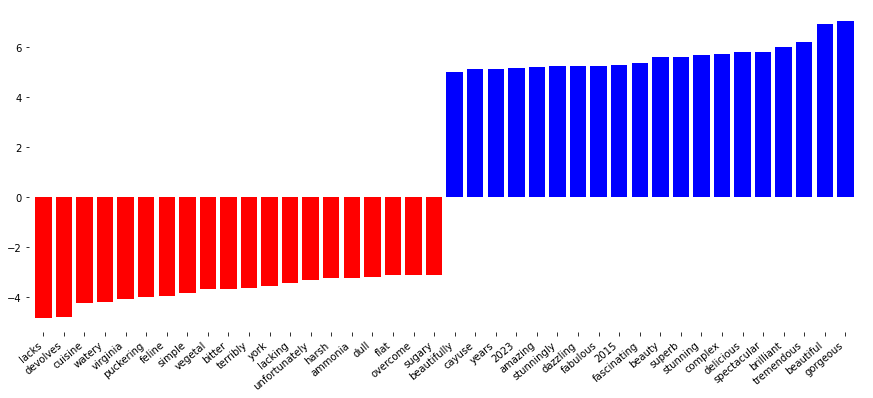

In [102]:
plt.figure(figsize=(15, 6))
plot_important_features(ridge.coef_.ravel(), np.array(tdif.get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()
plt.show()

In [621]:
def get_numeric_data(x):
#     return [record[:-2] for record in x] # get all columns exept the last one
    return x[:-2]
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['num1','num2']], validate=False)


def get_text_data(x):
#     return [record[-1] for record in x] #get last column that includes text
    return x['description']

def get_num_text_pipeline(df,regr):
#     transfomer_numeric = FunctionTransformer(get_numeric_data)
#     transformer_text = FunctionTransformer(get_text_data)
    
    transformer_text = FunctionTransformer(lambda x: x['description'], validate=False)
    transfomer_numeric = FunctionTransformer(lambda x: x[:-2], validate=False)

    pipeline = Pipeline([
        ('features', FeatureUnion([
                ('numeric_features', Pipeline([
                    ('selector', transfomer_numeric)
                ])),
                 ('text_features', Pipeline([
                    ('selector', transformer_text),
                    ('tfidf', TfidfVectorizer(analyzer='word'))
                ]))
             ])),
        ('estimator', regr)
    ])
    return pipeline

In [622]:
df_text_plus_numeric = pd.concat([us_df_cleaned,us_df_filled['description']],axis=1)
X,y=get_label_and_drop(df_text_plus_numeric)

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101,stratify=y)

In [629]:
X_train

,price,province_America,province_Arizona,province_California,province_Colorado,province_Idaho,province_Michigan,province_Missouri,province_New Mexico,province_New York,...,region_1_Russian River Valley,region_1_Santa Barbara County,region_1_Sonoma Coast,region_1_Sonoma County,region_1_Sta. Rita Hills,region_1_Walla Walla Valley (WA),region_1_Willamette Valley,region_1_Yakima Valley,region_1_other,description
90265,10.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"A Riesling/Viognier blend, this mixes citrus a..."
57446,43.000000,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"A new vineyard source for the producer, this w..."
121668,55.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,This bottling from Napa veteran St. Clement ha...
112146,18.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"With 9% residual sugar, this Chardonnay is dis..."
11539,42.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Here's a supple, polished and delicious Pinot ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35505,35.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"A burnt, reduced quality mars the fruit in thi..."
129808,17.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Tremendously pretty with honeysuckle and apric...
42723,65.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,This lavish yet regionally descriptive blend o...
84054,46.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"A very good Chardonnay, fancy and elegant, alt..."


In [625]:
model = get_num_text_pipeline(X_train,LinearRegression())
model.fit(X_train)

ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 40698, expected 40696.

In [630]:
for regr in rergressors:
    pipe = get_num_text_pipeline(X_train,regr)
    get_cross_val_score(scores_df,pipe, X_train, y_train,"combined")
scores_df

*********LinearRegression *********
*********Ridge *********
*********Lasso *********
*********ElasticNet *********


,r2
LinearRegression_combined,NaN
Ridge_combined,NaN
Lasso_combined,NaN
ElasticNet_combined,NaN


## Task 2 Word Vectors [50pts]

Use a pretrained word-embedding (word2vec, glove or fasttext) for featurization instead of the bag-of-words model. Does this improve classification? How about combining the embedded words with the BoW model?

In [ ]:
#your code here

# Task 3 Transformers (bonus / optional) [50pts] - Like Extra Assignment with 50% weight

Fine-tune a BERT model on the text data alone using the transformers library. How does this model compare to a BoW model, and how does it compare to a model using all features?

In [ ]:
#your code here